# 1. Start by fitting a linear regression model with target being life expectancy and predictor variable year.  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

### 1A. What coefficients do you get? Interpret the meaning of these coefficients. 

**1A Answer:** I got an Intercept of -468.138140 and a Slope of 0.267722. If the slope were zero then the average life expectancy would be -468.138140. This is an extrapolation because the minimum year is 1990, so any values before that would lead to an unreliable bet of predicting life expectancy. The slope represents a positive association between year variable and life expectancy variable. Also, for every one unit increase in year the average life expectancy increases by .267722.

In [4]:
country = pd.read_csv('../data/gdp_le.csv')
country.head()

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575
2,Afghanistan,2019,2079.921861,Asia,63.565
3,Afghanistan,2018,2060.698973,Asia,63.081
4,Afghanistan,2017,2096.093111,Asia,63.016


<Axes: xlabel='Year', ylabel='Life_Expectancy'>

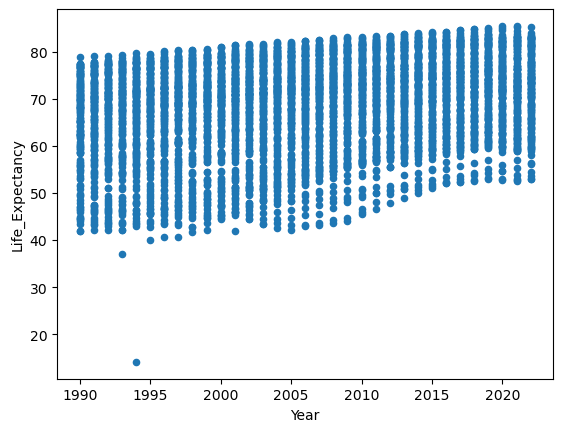

In [5]:
country.plot(kind='scatter', x='Year', y='Life_Expectancy')

In [6]:
lr_life_expectancy = smf.ols("Life_Expectancy ~ Year", data=country).fit()

In [7]:
lr_life_expectancy.params

Intercept   -468.138140
Year           0.267722
dtype: float64

### 1B. Using just the year makes the intercept term difficult to interpret. Create a new model, but this time use years since 1990 as your predictor variable. Inspect the new coefficients and interpret the meaning of them. Are they statistically significant?

**1B Answer:** The intercept is 64.6289, and represents the mean average life expectancy, if our predictor variable were 0. Both of their p-values evaluate to 0, so we would reject the null hypothesis and conclude that our predictor variable affects our target variable. The observed effect of year on average life_expectancy is statistically significant. 

**1BB. Answer:** Assumptions of Linear Regression
1. Linearity - we observe linearity through the scatterplot of the dataset
2. Independent Errors(outliers & influential points) - we can safely assume the errors are independent due to our random sampling.
3. The errors are Normally distributed - Based on the histogram and p-value produced by jarque_bera, the third assumption is violated. The distributions of values are left skewed.
4. The errors have Equal variance(constant variability) - based on the het_breuschpagan test we reject the null hypothesis. 

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.400e+01, 2.290e+02, 4.370e+02,
        7.800e+02, 1.049e+03, 1.739e+03, 1.255e+03]),
 array([-51.6017779 , -45.02078174, -38.43978557, -31.8587894 ,
        -25.27779324, -18.69679707, -12.1158009 ,  -5.53480473,
          1.04619143,   7.6271876 ,  14.20818377]),
 <BarContainer object of 10 artists>)

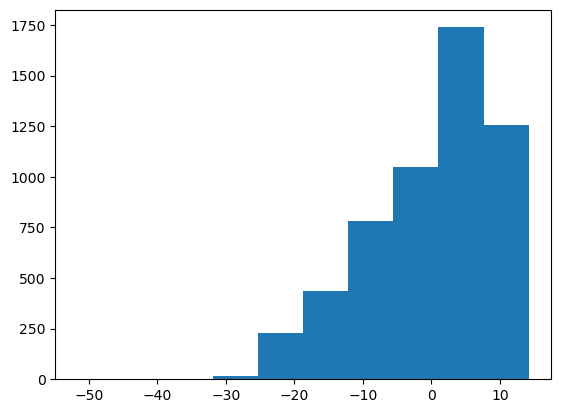

In [11]:
plt.hist(lr_life_expectancy.resid) # we are checking for a normal distribution of the residuals.

In [12]:
sms.jarque_bera(lr_life_expectancy.resid) # tests the null that the data is normally distributed against an alternative that the data follow some other distribution.
                                          # The second value is the p-value which equates to 0. 
                                          # We can reject the null hypothesis and conclude that the data doesn't follow a normal distribution.

(469.13755422457126,
 1.3429952398334921e-102,
 -0.7094491570127855,
 2.820040242309245)

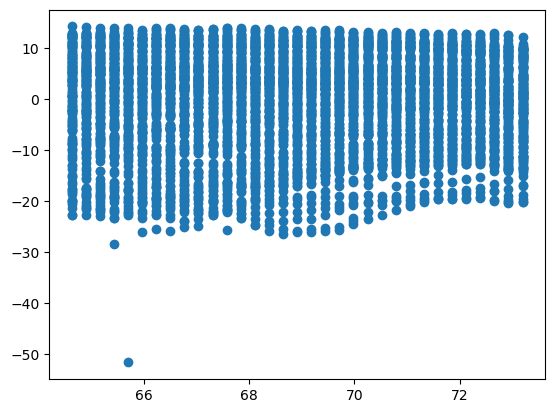

In [13]:
plt.scatter(lr_life_expectancy.fittedvalues, lr_life_expectancy.resid) # we are checking visually if the variance across the predictor variables is constant

In [14]:
sms.het_breuschpagan(lr_life_expectancy.resid, lr_life_expectancy.model.exog) #tests the null: variance across the predictor variables is constant.
                                                                              # the p-value is 0, so we reject the null hypothesis that.
                                                                           

(99.86814077557986,
 1.6288853146558213e-23,
 101.67674010569002,
 1.0491108967159921e-23)

In [15]:
lr_life_expectancy = smf.ols('Life_Expectancy ~ I(Year-1990)', data=country).fit()

In [16]:
lr_life_expectancy.params

Intercept         64.628889
I(Year - 1990)     0.267722
dtype: float64

In [17]:
lr_life_expectancy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     424.0
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           8.13e-91
Time:                        16:17:25   Log-Likelihood:                -19950.
No. Observations:                5504   AIC:                         3.990e+04
Df Residuals:                    5502   BIC:                         3.992e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         64.6289      0.245    263.308      0.000      64.148      65.110
I(Year - 1990)     0.2677      0.013     20.591      0.000       0.242       0.293
==============================================================================
Omnibus:                      387.409   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              469.138
Skew:                          -0.709   Prob(JB):                    1.34e-102
Kurtosis:                       2.820   Cond. No.                         37.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 1C. Compare the actual mean life expectancy per year to the model's estimate. How well does it do?  

**1C Answer:**  Answer: The actual mean was 69.010% and the predictions mean was 68.912% - the prediction was about one percent over.

In [21]:
pred_df = pd.DataFrame(
    {
        'Year': np.linspace(start=country['Year'].min(), stop=country['Year'].max()) # we are creating a dataframe.
    }
)

pred_df['mean_estimate'] = lr_life_expectancy.predict(pred_df)

pred_df.head(2)

,Year,mean_estimate
0,1990.000000,64.628889
1,1990.653061,64.803728


In [22]:
country['Life_Expectancy'].mean(), pred_df['mean_estimate'].mean()

(69.01011528644356, 68.9124434064843)

### 1D. Plot the actual values against your model's estimates for the mean life expectancy.  

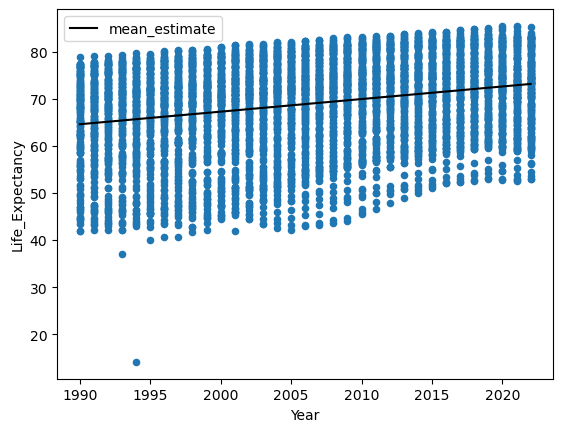

In [24]:
fig, ax = plt.subplots()
country.plot(kind='scatter', x='Year', y='Life_Expectancy', ax=ax)
pred_df.plot(kind='line', x='Year', y='mean_estimate', color='black', ax=ax);

### 1E. Inspect the R-squared value for the model. does it make sense, given the plot?   

**1E Answer**:The R2 value is 0.072 which makes sense because the data is stretched far off above and below the least square regression line. I don't even know if you can fit a line to this.

In [27]:
lr_life_expectancy.rsquared

0.07154748843194647

# 2. Filter the full dataset down to just the year 2021. Fit a linear regression model with target being life expectancy and predictor variable gdp per capita.  

In [29]:
country_2021 = country.loc[country['Year'] == 2021]

<Axes: xlabel='GDP_Per_Capita', ylabel='Life_Expectancy'>

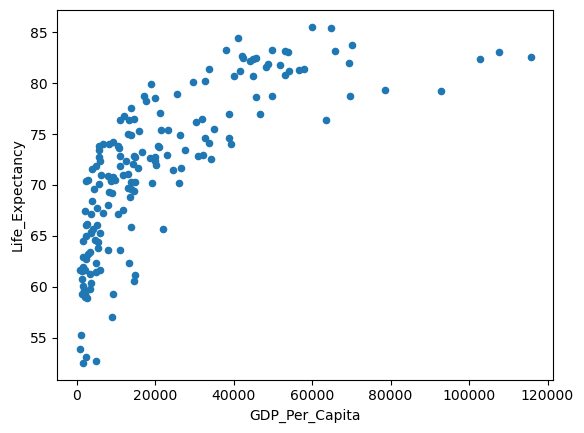

In [30]:
country_2021.plot(kind='scatter', x='GDP_Per_Capita', y='Life_Expectancy') # I am just inspecting the shape of the observations.

In [31]:
lr_life_expectancy_2021 = smf.ols('Life_Expectancy ~ GDP_Per_Capita', data=country_2021).fit()

### 2a. What coefficients do you get? Interpret the meaning of those coefficients. 

**2a Answer:** I get an intercept of 65.949870 and slope of 0.000257. If you were born in 2021 in a country with 0 GDP per capita, you can expect to live to 66 years old on average. For every 1 unit increase in GDP_Per_Capita we can expect a 0.000257 increase in life expectancy. There is a positive association between the variables. For every 1 unit increase in GDP per capita, there is a .000257 increase in the average life expectancy. 

In [34]:
lr_life_expectancy_2021.params

Intercept         65.949870
GDP_Per_Capita     0.000257
dtype: float64

### 2b. Refit your model, but this time use thousands of dollars of gdp per capita as your predictor. How does this change your coefficients?


**2B Answer:** Divides the Intercept by 10 and mutliplies the slope by 10,000.

In [37]:
lr_life_expectancy_2021 = smf.ols('Life_Expectancy ~ I(GDP_Per_Capita * 1000)', data=country_2021).fit()

In [38]:
lr_life_expectancy_2021.params

Intercept                   6.594987e+01
I(GDP_Per_Capita * 1000)    2.568917e-07
dtype: float64

### 2c. Are the coefficients statistically significant? 

**2c Answer** The answer is statistically significant. We can reject the null hypothesis that increasing GDP per capita doesn't affect the average life expectancy. 

In [41]:
lr_life_expectancy_2021.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     213.4
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           6.81e-32
Time:                        16:17:26   Log-Likelihood:                -529.25
No. Observations:                 173   AIC:                             1062.
Df Residuals:                     171   BIC:                             1069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   65.9499      0.549    120.225      0.000      64.867      67.033
I(GDP_Per_Capita * 1000)  2.569e-07   1.76e-08     14.608      0.000    2.22e-07    2.92e-07
==============================================================================
Omnibus:                       11.676   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.725
Skew:                          -0.664   Prob(JB):                      0.00173
Kurtosis:                       2.946   Cond. No.                     4.34e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**2CC Answer:** Assumptions of Linear regressions
1. Linearity - The condition is satisfied based on the linear observation between the variables in the scatterplot. 
2. Independent errors - We used a random sample, so we assume this condition is satisfied.
3. Errors Normally distributed - Null hypothesis states the dataset is normally distributed. Based on the Jarque-Bera test we derived a p-value of 0.001 -- we reject the null hypothesis.
4. Equal Variability - Null hypothesis states the variability of observations around the least squares regression remains constant. Based on the het_breuschpagan test we derived a p-value of .309 -- we fail to reject the null hypothesis.

In [43]:
sms.jarque_bera(lr_life_expectancy_2021.resid)

(12.724842533019268,
 0.0017251845192994355,
 -0.6637725985434986,
 2.9459646075602697)

In [44]:
sms.het_breuschpagan(lr_life_expectancy_2021.resid, lr_life_expectancy_2021.model.exog)

(1.0321627180645874, 0.3096512481674493, 1.026353692520304, 0.3124479407320211)

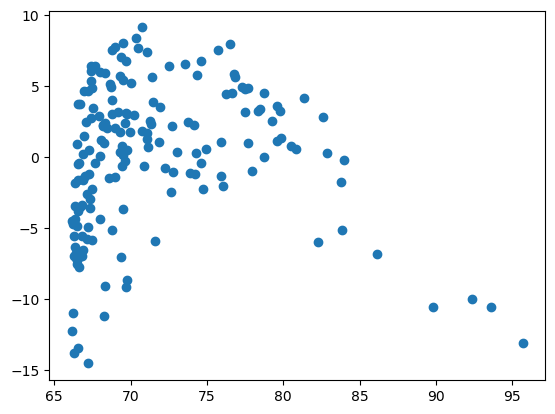

In [45]:
plt.scatter(lr_life_expectancy_2021.fittedvalues, lr_life_expectancy_2021.resid) # visualization of the he thet_breuschpagan test. 
# we can observe a patter which qualifies the rejection of the null hypothesis. 

### 2D What does your model estimate for the mean life expectancy for a country whose gdp per capita is 50,000? What about one whose gdp per capita is 100,000?

**2D Answer:** Models estimate for mean life expectancy: on average, there is a 79-year-old life expectancy for 50000 gdp per capita, and a 92-year-old life expectancy for 100000 gdp per capita -- both for the year 2021.

In [48]:
pred_df_2021 = pd.DataFrame(
    {
        'GDP_Per_Capita': np.linspace(start=country_2021['GDP_Per_Capita'].min(), stop=country_2021['GDP_Per_Capita'].max())
    }
)
pred_df_2021['mean_estimate_2021'] = lr_life_expectancy_2021.predict(pred_df_2021)

In [49]:
pred_df_2021.loc[pred_df_2021['GDP_Per_Capita'] >= 50000].nsmallest(1, 'GDP_Per_Capita')

,GDP_Per_Capita,mean_estimate_2021
22,52332.993119,79.393784


In [50]:
pred_df_2021.loc[pred_df_2021['GDP_Per_Capita'] >= 100000].nsmallest(1, 'GDP_Per_Capita')

,GDP_Per_Capita,mean_estimate_2021
43,101605.604688,92.051511


### 2e. Plot the actual values compared to your model's estimates for mean life expectancy. How would you assess the model's fit?

**2e Answer:** The r squared value is .55514. We can explain 55% of the varibility in Life Expectancy by GDP_Per_Capita. 

<Axes: xlabel='GDP_Per_Capita', ylabel='Life_Expectancy'>

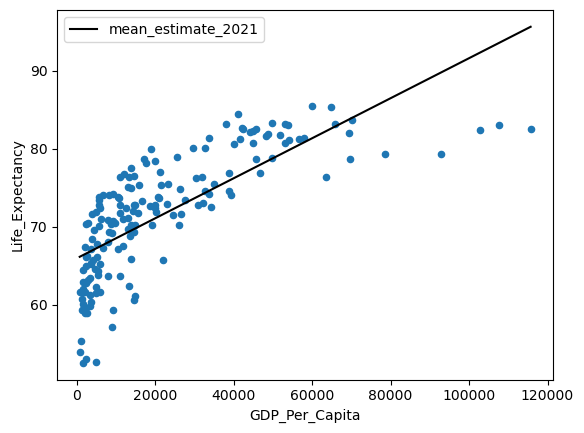

In [53]:
fig, ax = plt.subplots()
country_2021.plot(kind='scatter', x='GDP_Per_Capita', y='Life_Expectancy', ax=ax)
pred_df_2021.plot(kind='line', x='GDP_Per_Capita', y='mean_estimate_2021', color='black', ax=ax)

In [54]:
lr_life_expectancy_2021.rsquared

0.555146054691391

# 3. Now, fit a model for life expectancy based on the log of gdp per capita.  

In [56]:
country_2021['Log_GDP_Per_Capita'] = np.log(country_2021['GDP_Per_Capita'])

C:\Users\billy\AppData\Local\Temp\ipykernel_101260\1098654982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_2021['Log_GDP_Per_Capita'] = np.log(country_2021['GDP_Per_Capita'])


In [57]:
lr_country_2021_log = smf.ols('Life_Expectancy ~ Log_GDP_Per_Capita', data=country_2021).fit()

### 3a. Inspect the coefficients for this model. Are they statistically significant?

**3A Answers**: The intercept is 18.946 and the slope is 5.589. Yes, they're statistically significant, so the predictor variable (gdp per capita) affects the target variable. 

In [60]:
lr_country_2021_log.params

Intercept             18.946970
Log_GDP_Per_Capita     5.589014
dtype: float64

In [61]:
lr_country_2021_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     432.6
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           1.06e-48
Time:                        16:17:27   Log-Likelihood:                -490.22
No. Observations:                 173   AIC:                             984.4
Df Residuals:                     171   BIC:                             990.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             18.9470      2.547      7.438      0.000      13.919      23.975
Log_GDP_Per_Capita     5.5890      0.269     20.798      0.000       5.059       6.119
==============================================================================
Omnibus:                       16.862   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.922
Skew:                          -0.725   Prob(JB):                     7.78e-05
Kurtosis:                       3.725   Cond. No.                         77.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3b. Interpret these coefficients. What does the model estimate for the average life expectancy for countries with a gdp per capita of 50,000? What about for those with a gdp per capita of $100,000?

**3b Answer:** We've performed a log transformation on the x axis by scaling it down using a log function. For every one unit increase in the log gdp per capita there is a multiplicative increase in the original log gdp per capita. Our parameters display positive assocation between log gdp per capita and life expectancy. The average life expectancy for people with a gdp per capita of 50000 was 56 and 75 for 100000.

In [64]:
pred_df_2021_log = pd.DataFrame(
    {
        'Log_GDP_Per_Capita': np.linspace(start=country_2021['Log_GDP_Per_Capita'].min(), stop=country_2021['Log_GDP_Per_Capita'].max())
    }
)
pred_df_2021_log['log_mean_estimate_2021'] = lr_country_2021_log.predict(pred_df_2021_log)

In [65]:
pred_df_2021_log.loc[pred_df_2021_log['Log_GDP_Per_Capita'] >= 5].nsmallest(1, 'Log_GDP_Per_Capita' )

,Log_GDP_Per_Capita,log_mean_estimate_2021
0,6.570976,55.672248


In [66]:
pred_df_2021_log.loc[pred_df_2021_log['Log_GDP_Per_Capita'] >= 10].nsmallest(1, 'Log_GDP_Per_Capita' )

,Log_GDP_Per_Capita,log_mean_estimate_2021
34,10.101173,75.402568


### 3c. Plot the actual values compared to your models' estimates for the mean life expectancy. How does this comparbe to the non-logged model?

**3c Answer:** This line has a better fit. Its r squred value of .717 confirms a better fit too. 

<Axes: xlabel='Log_GDP_Per_Capita', ylabel='Life_Expectancy'>

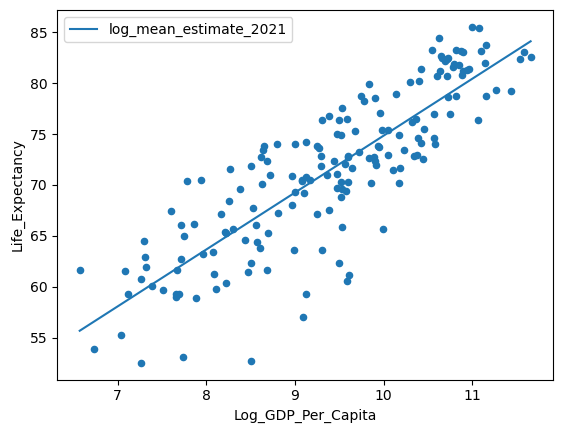

In [70]:
fix, ax = plt.subplots()
country_2021.plot(kind='scatter', x='Log_GDP_Per_Capita', y='Life_Expectancy', ax=ax)
pred_df_2021_log.plot(kind='line', x='Log_GDP_Per_Capita', y='log_mean_estimate_2021', ax=ax)

# 4. Finally, return to the full dataset.

### 4A First, fit a linear regression model for life expectancy based on the log of gdp per capita.

In [78]:
country['Log_GDP_Per_Capita'] = np.log(country['GDP_Per_Capita'])

In [82]:
lr_country_log = smf.ols('Life_Expectancy ~ Log_GDP_Per_Capita', data=country)

### 4B Then, add the year variable to your model. How can you interpret the coefficient associated with year? What limitations or weaknesses might this model have?

**4B Answer:** I cannot understand fully. 

In [105]:
lr_country_log = smf.ols('Life_Expectancy ~ Log_GDP_Per_Capita + I(Year-1990)', data=country).fit()

In [107]:
lr_country_log.params

Intercept             8.561151
Log_GDP_Per_Capita    6.359936
I(Year - 1990)        0.134487
dtype: float64